## **TAST-1**
## **Anurag Ranjan**
### **Prediction using Supervised ML**
**Goal:** Predict the percentage of an student on the no. of study hours by using the simple Linear Regression Algorithm.

### Importing required modules.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
pwd

'C:\\Users\\HP'

### Reading Data.

In [3]:
data_set = pd.read_csv('scores.csv')
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Getting Data Info.

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Describing the Data 

In [5]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data_set.shape

(25, 2)

### Relation plotting graph between the independent and the targeted values

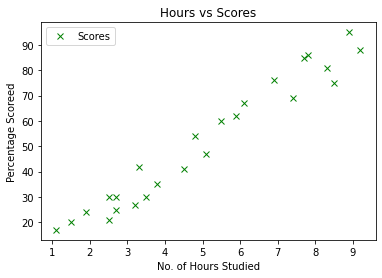

In [7]:
data_set.plot(x='Hours', y='Scores', style='x', color='g')  
plt.title('Hours vs Scores')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Scoreed')  
plt.show()

**Observation**: whis the help of the above plotting we can clearly find that the scores of the student are linearly relatable to the no. of hours the study.

**now splitting the data into testing and training**

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data_set['Hours'].values.reshape(-1,1), 
                                                    data_set['Scores'], test_size=0.2, random_state=0)

In [10]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((20, 1), (20,), (5, 1), (5,))

**now time for applying Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression  

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

In [13]:
coefficient = regressor.coef_
intercept = regressor.intercept_

# since, m = m*x + c
line = (data_set['Hours'].values * coefficient) + intercept

**Plotting and testing the pridicted values**

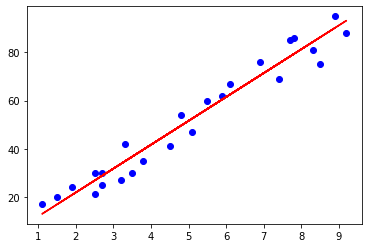

In [14]:
plt.scatter(data_set.Hours, data_set.Scores, color='b')
plt.plot(data_set.Hours, line, color='r');
plt.show()

In [15]:
pred = regressor.predict(X_test)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing Actual vs Predicted**

In [16]:
# Comparing Actual vs Predicted
data_set = pd.DataFrame({'Actual': Y_test, 'Predicted': pred})  
data_set

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


**evaluating the model**

In [17]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [18]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, pred))
print("Mean Square Error: ", metrics.mean_squared_log_error(Y_test, pred))
print("Root Mean Square Error: ", metrics.mean_squared_log_error(Y_test, pred)**0.5)
print("R2 Scores: ", metrics.r2_score(Y_test, pred))

Mean Absolute Error:  4.183859899002975
Mean Square Error:  0.018454923013931698
Root Mean Square Error:  0.13584889772807027
R2 Scores:  0.9454906892105355


In [19]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
mean_squared_log_error(y_true, y_pred)

y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
mean_squared_log_error(y_true, y_pred)
mean_squared_log_error(y_true, y_pred, multioutput='raw_values')

mean_squared_log_error(y_true, y_pred, multioutput=[0.3, 0.7])


0.060029394179700345

**printing the mean absolute error**

In [20]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, pred))

Mean Absolute Error:  4.183859899002975


**now computing the scores of a student if he/she studies for 9.25hrs in a day.**

In [21]:
# You can also test with your own data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


**so the Predicted Score of the student will be 93.69173248737535 if he/she studies for 9.25hrs in a day.**